# STOCK MARKET PREDICTION

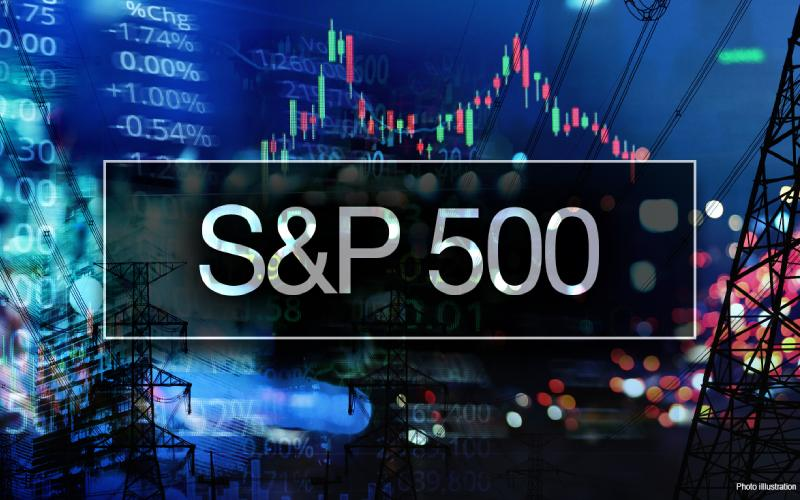

In [160]:
import matplotlib.pyplot as plt
from IPython.display import Image
Image(filename='S&P500img.jpg',width=900,height=10)

- **A stock represents ownership in a company and is traded on stock exchanges, while a share is a unit of ownership in a company. A predictive model for stock price can help investors make informed decisions on when to buy or sell, potentially leading to better investment returns.**
  **Predicting how stock market will perform is diffficult. There are external factors involved in prediction such as physical and psychological factors, rational and irrational behaviour and so on. All these factors combine to make stock prices dynamic and volatile.**


- **In this project, S&P 500 data is used for stock market predictions. The S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on American stock exchanges. It is widely regarded as a benchmark for the overall U.S. stock market performance.**


- **PROBLEM STATEMENT : Making trading decisions in the stock market without accurate predictions about the direction of stock prices can lead to significant financial risks for investors and financial institutions. To avoid potential losses, it is crucial to identify whether the stock price will be higher or lower than the current day's price. In order to tackle this challenge, a Python-based predictive model utilizing machine learning techniques is developed to forecast whether a company's stock price will increase or decrease the following day.**

In [150]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

###  Loading and Understanding Dataset

In [151]:
df=pd.read_csv('SnP500.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,02-01-1980,0.000000,108.430000,105.290001,105.760002,40610000,0,0
1,03-01-1980,0.000000,106.080002,103.260002,105.220001,50480000,0,0
2,04-01-1980,0.000000,107.080002,105.089996,106.519997,39130000,0,0
3,07-01-1980,0.000000,107.800003,105.800003,106.809998,44500000,0,0
4,08-01-1980,0.000000,109.290001,106.290001,108.949997,53390000,0,0
...,...,...,...,...,...,...,...,...
10838,23-12-2022,3815.110107,3845.800049,3797.010010,3844.820068,2819280000,0,0
10839,27-12-2022,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,0,0
10840,28-12-2022,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,0,0
10841,29-12-2022,3805.449951,3858.189941,3805.449951,3849.280029,3003680000,0,0


### Feature Explanation :

**Date:** The date of the stock price data point.

**Open:** The price at which the stock opened for trading on a given day.

**High:** The highest price the stock reached during the day.

**Low:** The lowest price the stock reached during the day.

**Close:** The price of the stock at the end of the trading day.

**Volume:** The total number of shares of the stock that were traded during the day.

**Dividends:** Any dividends paid out for the stock on that day.

**Stock splits:** Any stock splits that occurred on that day.

In [95]:
# Dimension of dataset
df.shape

# number of rows = 10843
# number of columns = 8

(10843, 8)

In [96]:
# Verifying datatypes of the columns
df.info()

# Column 'Date' is identified as object. We should convert its datatype to datetype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10843 entries, 0 to 10842
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10843 non-null  object 
 1   Open          10843 non-null  float64
 2   High          10843 non-null  float64
 3   Low           10843 non-null  float64
 4   Close         10843 non-null  float64
 5   Volume        10843 non-null  int64  
 6   Dividends     10843 non-null  int64  
 7   Stock Splits  10843 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 677.8+ KB


In [152]:
# It is recommended that we make our time series reference as the index. Hence converting 'Date' columns' datatype and 
# making it the index 

df = pd.read_csv('SnP500.csv', parse_dates = ['Date'], index_col = 'Date')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-02-01,0.000000,108.430000,105.290001,105.760002,40610000,0,0
1980-03-01,0.000000,106.080002,103.260002,105.220001,50480000,0,0
1980-04-01,0.000000,107.080002,105.089996,106.519997,39130000,0,0
1980-07-01,0.000000,107.800003,105.800003,106.809998,44500000,0,0
1980-08-01,0.000000,109.290001,106.290001,108.949997,53390000,0,0
...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,2819280000,0,0
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,0,0
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,0,0


In [98]:
# Statistical Summary of the data

df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,10843.0,10843.0
mean,1191.922660,1205.639827,1190.746298,1198.676045,1.875496e+09,0.0,0.0
std,1040.851044,1039.509958,1027.295777,1033.730664,1.891712e+09,0.0,0.0
min,0.000000,99.580002,94.230003,98.220001,1.499000e+07,0.0,0.0
25%,348.779999,350.934998,347.034988,348.979996,1.829950e+08,0.0,0.0
50%,1084.189941,1093.189941,1074.910034,1084.530029,1.137900e+09,0.0,0.0
75%,1470.605041,1478.840027,1459.979981,1470.705017,3.490695e+09,0.0,0.0
max,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10,0.0,0.0


### DATA PREPROCESSING

In [99]:
# Checking duplicate values
df[df.duplicated()]

# no duplicate rows

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,


In [100]:
# Checking the presence of null value

df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

<AxesSubplot:ylabel='Date'>

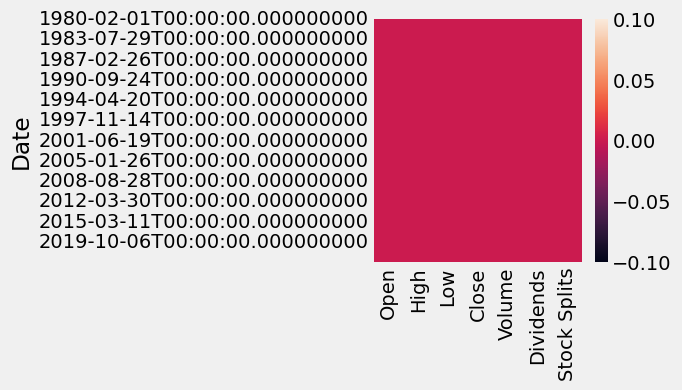

In [159]:
plt.figure(figsize=(3,3))
sns.heatmap(df.isnull())

##### Inference : 
There are no null values.

### VISUALIZATION OF COLUMNS IN THE DATA

- ##### Distribution of Columns in the data

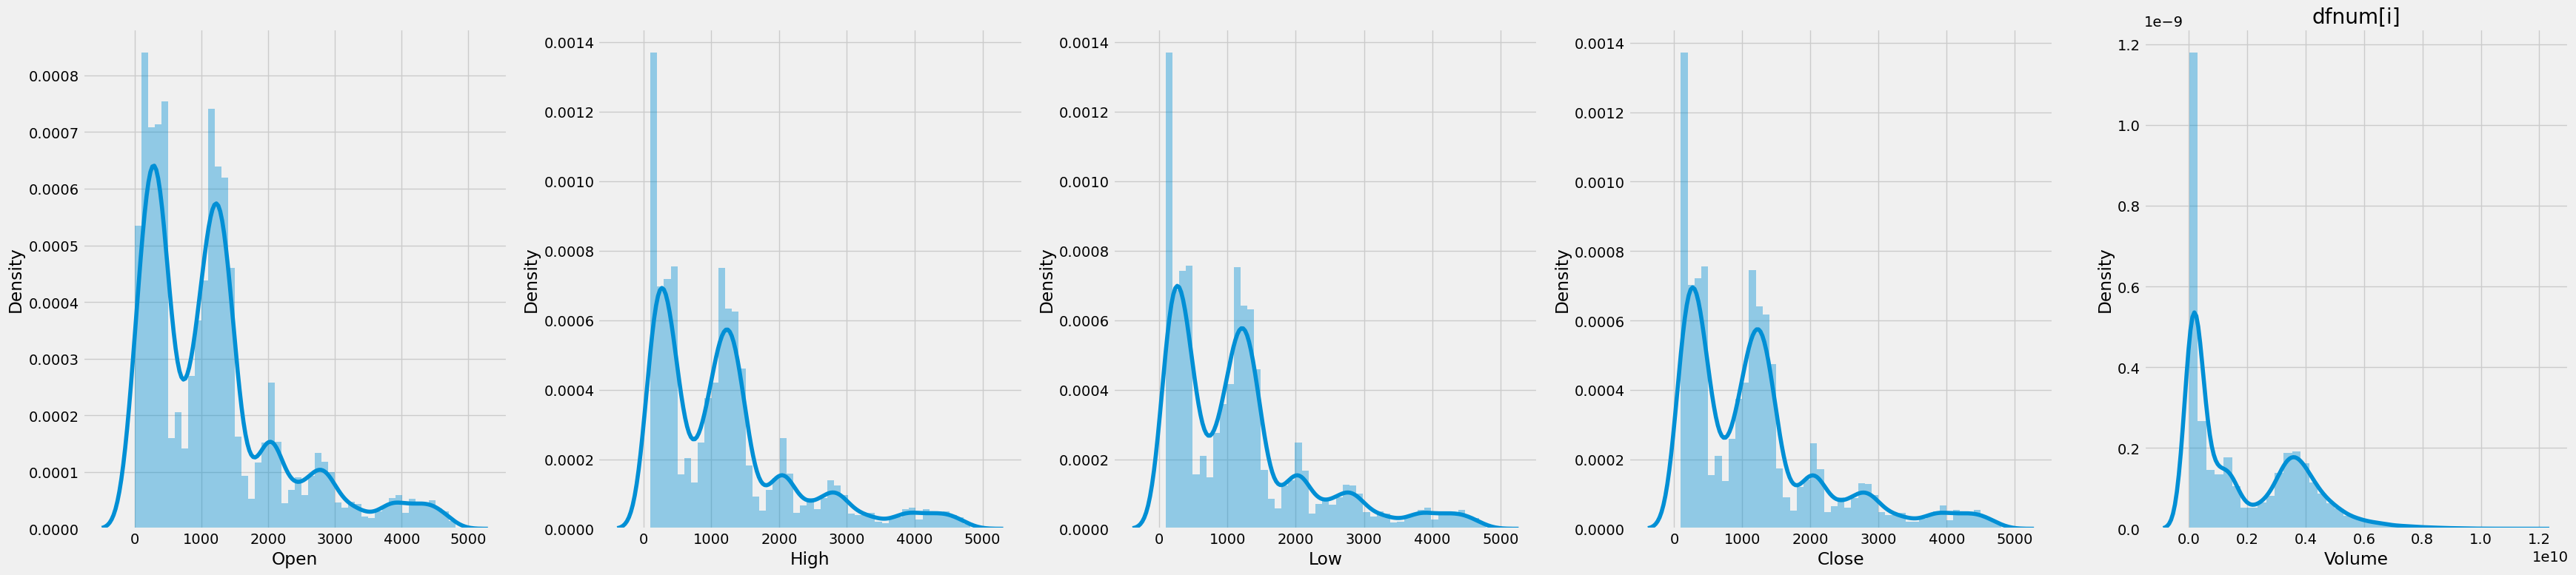

In [155]:
dfnum = df.select_dtypes(include=np.number)
fig,ax= plt.subplots(1,5,figsize=(35,8))

for i,subplots in zip(dfnum ,ax.flatten()):
    sns.distplot(dfnum[i],ax=subplots)
    plt.title('dfnum[i]')
plt.tight_layout()


##### Inference: 
All the above columns have positive skewness. The presence of skewness can make the analysis and models biased. Hence, skewness needs to be treated.


- ##### Checking the presence of outliers

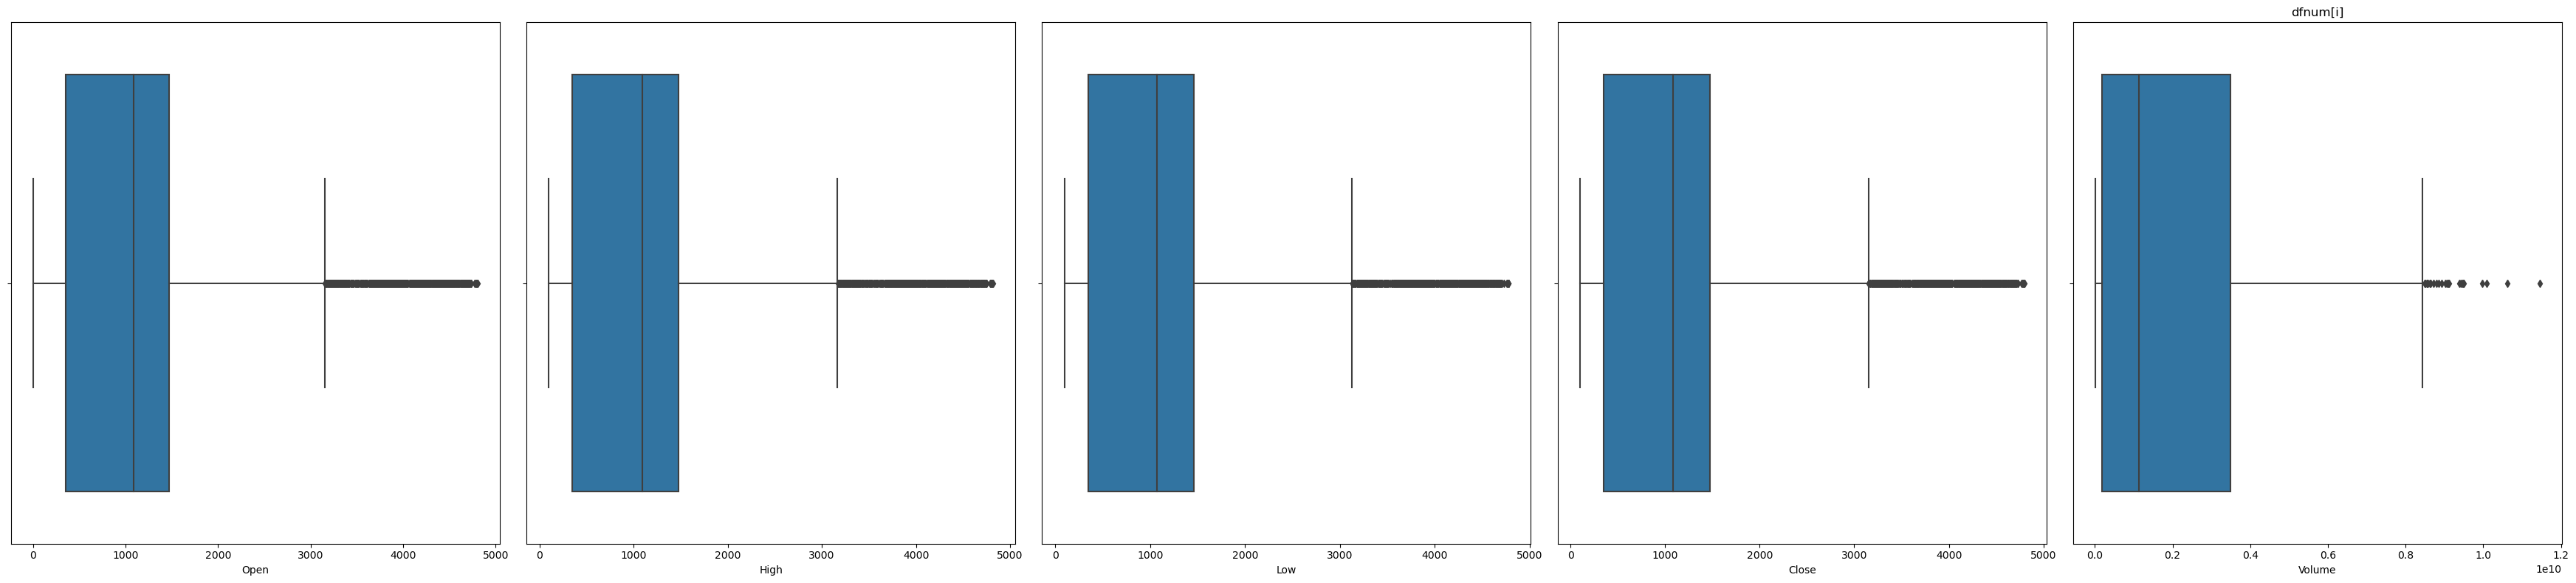

In [102]:
dfnum = df.select_dtypes(include=np.number)
fig,ax= plt.subplots(1,5,figsize=(35,8))

for i,subplots in zip(dfnum ,ax.flatten()):
    sns.boxplot(dfnum[i],ax=subplots)
    plt.title('dfnum[i]')
plt.tight_layout()


##### Inference: 
The features have outliers. Outliers can be treated in many ways such as dropping, capping, binning, conducting separate analysis on it and the like. 



### The features in the dataset are of time series nature. We can visualize how it has changed over time by plotting it against time

Text(0.5, 1.0, 'Close')

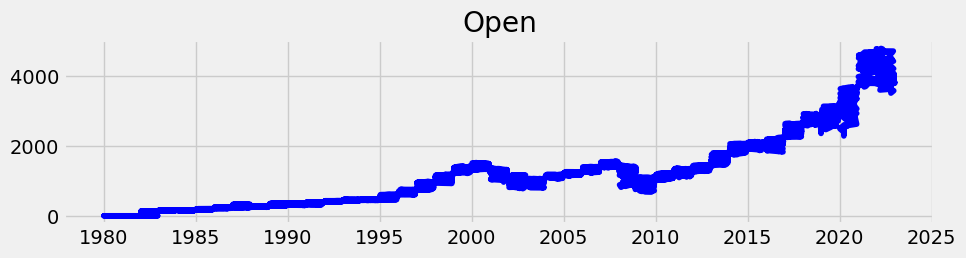

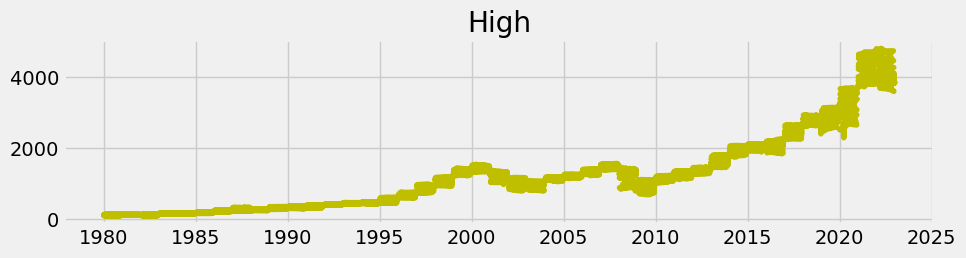

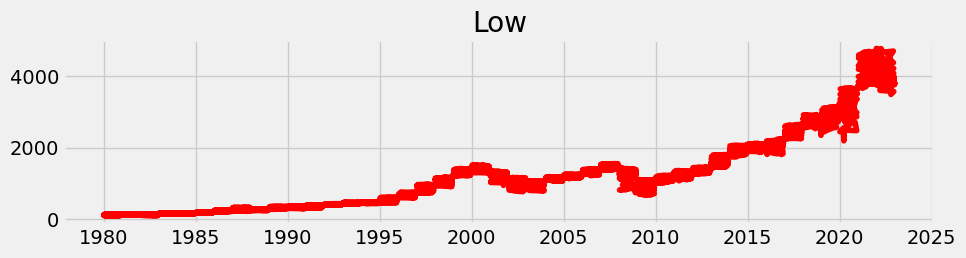

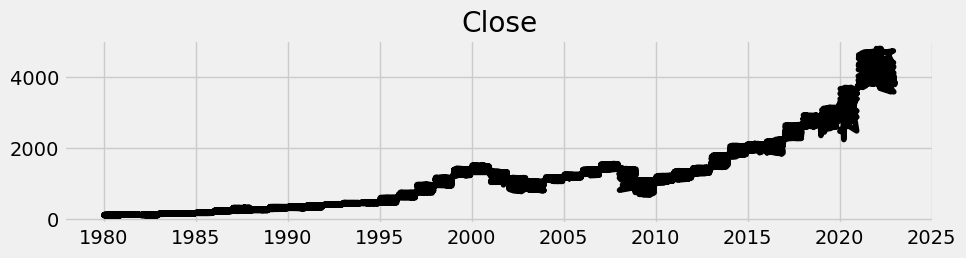

In [154]:
plt.figure(figsize=(22,5))
plt.subplot(221)
plt.style.use('fivethirtyeight')
plt.plot(df['Open'], color='blue')
plt.title('Open')

plt.figure(figsize=(22,5))
plt.subplot(222)
plt.style.use('fivethirtyeight')
plt.plot(df['High'], color='y')
plt.title('High')

plt.figure(figsize=(22,5))
plt.subplot(223)
plt.style.use('fivethirtyeight')
plt.plot(df['Low'], color='red')
plt.title('Low')

plt.figure(figsize=(22,5))
plt.subplot(224)
plt.style.use('fivethirtyeight')
plt.plot(df['Close'], color='black')
plt.title('Close')

##### Inference:
All the features have witnessed a rising trend from 1980 to 2022. Only the feature 'Open' was zero(0) for some initial years when all other features had positive value. Around the year 2000 a peak was achieved after which it started falling for some consequent years. Since 2010 a somewhat steady rise has been there. We can conclude that the S&P stocks have performed well over the period.

<AxesSubplot:xlabel='Date'>

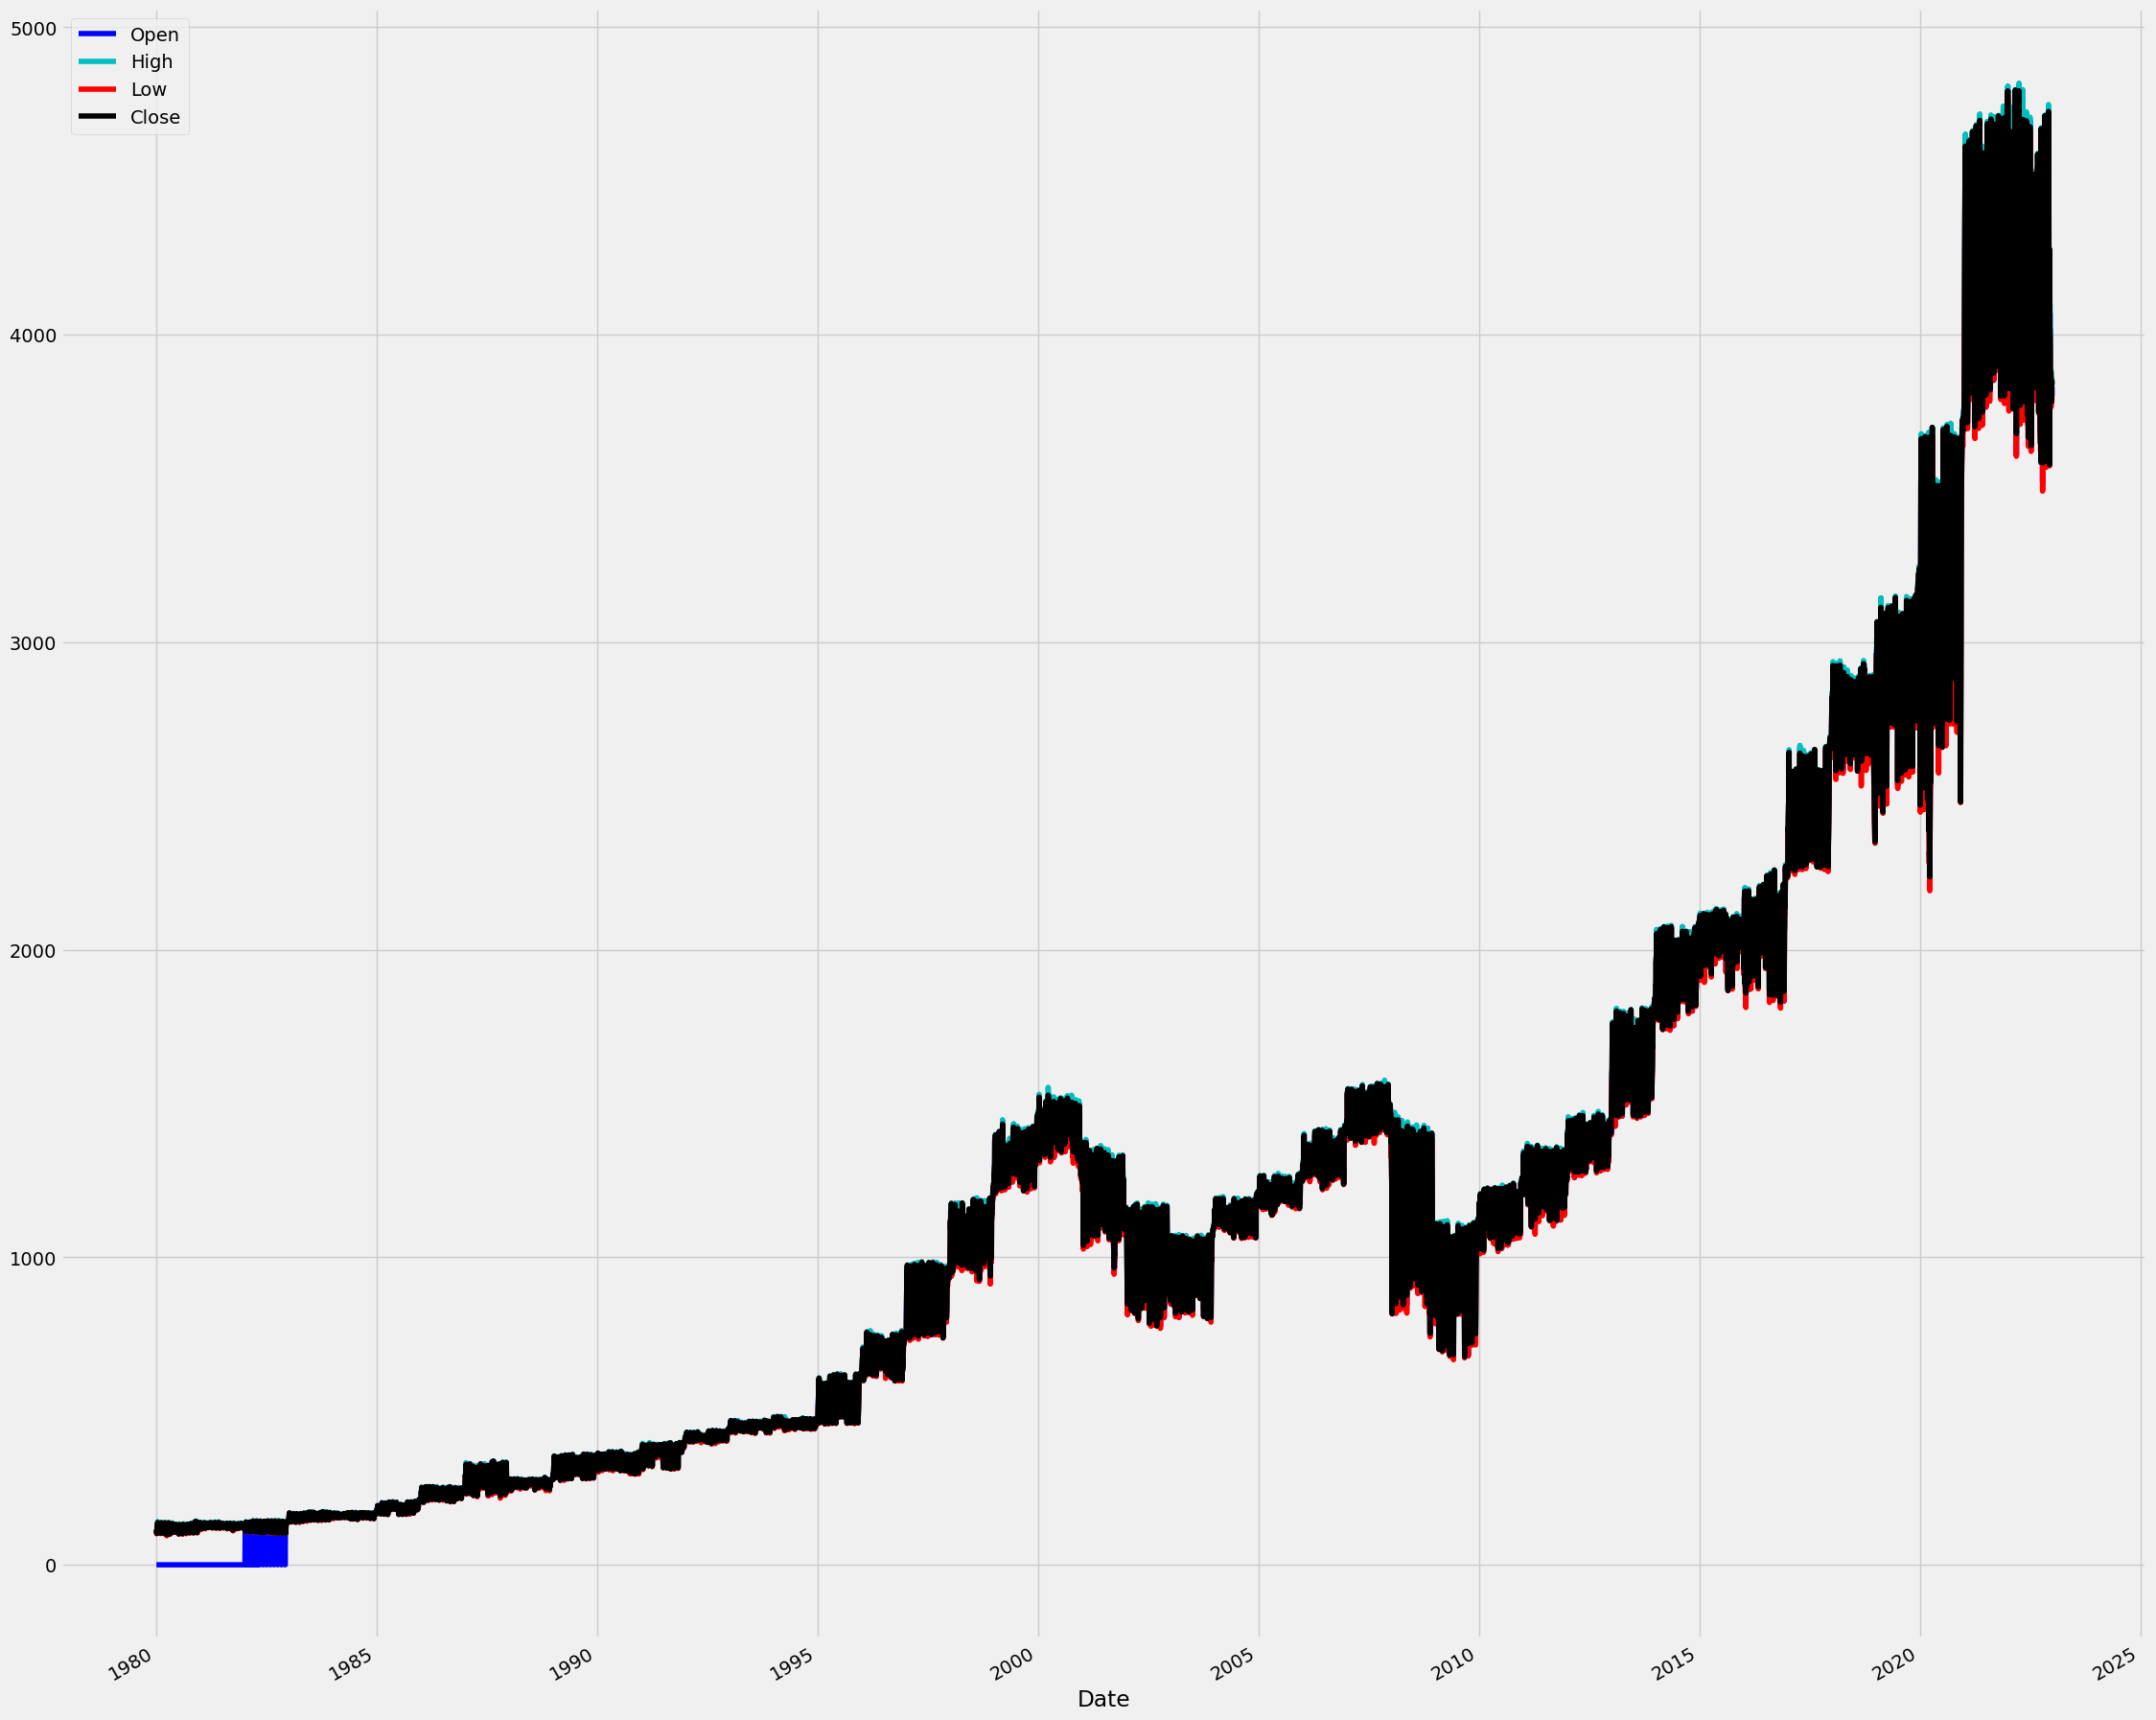

In [156]:
# Plotting the features together.

df.plot( y=['Open', 'High', 'Low', 'Close'], color=['b', 'c', 'r', 'black'], figsize=(25,25))

##### Inference:
This graph shows that the features 'Open', 'High', 'Low', 'Close' have had similar values for a particular day over the years(as it overlaps). Only in the beginning of 1980s, the Open price was zero(0)

### Time Series Decomposition
#### Close price is an essential feature for someone who wants to trade in stock market as it gives a hint about next day's stock price. Based on it, decisions are made. Since 'Close' has temporal nature, we can decompose it and analyse its trend, seasonality and residual 

In [105]:
# Decomposing the time series Additively

from statsmodels.tsa.seasonal import seasonal_decompose
df_add_decompose = seasonal_decompose(df['Close'], model = 'additive', period = 12)

<Figure size 2500x500 with 0 Axes>

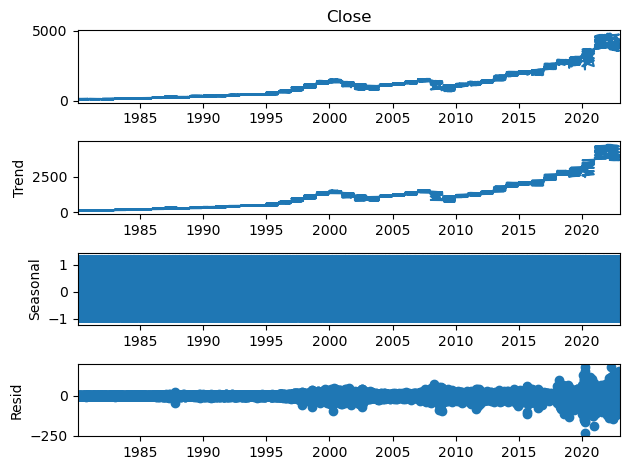

In [106]:
plt.figure(figsize=(25,5))
df_add_decompose.plot()
plt.show()

##### Inference
1. There is a rising trend
2. The plot for seasonality suggests that the seasonal pattern is constant over time, and there is no or very weak variation within each seasonal cycle. 
3. Since residual is not completely a line around 0 (has negative values in recent yers), it suggests that there is still some unexplained variation in time series that is not captured by the trend, seasonal, and other components.

The fact that the residual component shows negative values towards the end suggests that there may be some recent changes or trends in the data that are not captured by the other components. This could be due to various reasons, such as changes in market conditions, economic factors, or other external factors that are not explicitly included in the decomposition.

In [107]:
#Decompose the time series Multiplicatively

from statsmodels.tsa.seasonal import seasonal_decompose
df_add_decompose = seasonal_decompose(df['Close'], model = 'multiplicative', period = 12)

<Figure size 2500x500 with 0 Axes>

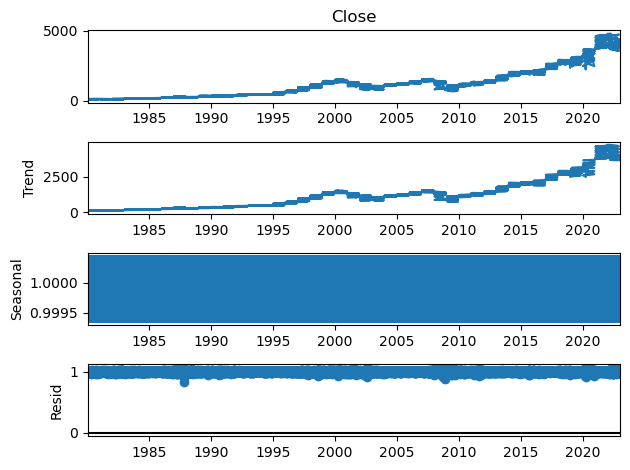

In [108]:
plt.figure(figsize=(25,5))
df_add_decompose.plot()
plt.show()

##### Inference
1.There is a rising trend

2.The plot for seasonality suggests that the seasonal pattern is constant over time, and there is no or very weak variation within each seasonal cycle.

3.Since residual is a thick line around 1, it suggests that the decomposition has explained most of the variability in the data, and there is little unexplained variation left. 

#### Dropping redudant columns which don't help in prediction

In [109]:
df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [110]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-02-01,0.0,108.430000,105.290001,105.760002,40610000
1980-03-01,0.0,106.080002,103.260002,105.220001,50480000
1980-04-01,0.0,107.080002,105.089996,106.519997,39130000
1980-07-01,0.0,107.800003,105.800003,106.809998,44500000
1980-08-01,0.0,109.290001,106.290001,108.949997,53390000


### SETTING UP TARGET VARIABLE
Here we're assuming that an individual wants to buy stocks and earn profit. To do so he/she needs to speculate the stock price for future. As a buyer, the goal is to buy stock when it's at a lower price and sell at a higher price to get profit.


Hence a column 'Tomorrow' is created at first which holds the value of next day's closing price. On comparing today's closing price and tomorrow's closing price one could decide whether to buy the stocks or not. Then the target variable is created, names as 'Target'. 

Its value=0 when tomorrow's closing price is less than today's closing price and it's equal to 1 if tomorrows' closing price is more than today's. So whenever Target=1, the individual can buy the stock on that day.

In [111]:
# Creating column Tomorrow

df["Tomorrow"] = df["Close"].shift(-1)

In [112]:
df.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-02-01,0.0,108.430000,105.290001,105.760002,40610000,105.220001
1980-03-01,0.0,106.080002,103.260002,105.220001,50480000,106.519997
1980-04-01,0.0,107.080002,105.089996,106.519997,39130000,106.809998
1980-07-01,0.0,107.800003,105.800003,106.809998,44500000,108.949997
1980-08-01,0.0,109.290001,106.290001,108.949997,53390000,109.050003


In [113]:
# Creating Target column

df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)
df.head(10)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-02-01,0.0,108.430000,105.290001,105.760002,40610000,105.220001,0
1980-03-01,0.0,106.080002,103.260002,105.220001,50480000,106.519997,1
1980-04-01,0.0,107.080002,105.089996,106.519997,39130000,106.809998,1
1980-07-01,0.0,107.800003,105.800003,106.809998,44500000,108.949997,1
1980-08-01,0.0,109.290001,106.290001,108.949997,53390000,109.050003,1
1980-09-01,0.0,111.089996,108.410004,109.050003,65260000,109.889999,1
1980-10-01,0.0,110.860001,108.470001,109.889999,55980000,109.919998,1
1980-11-01,0.0,111.160004,108.889999,109.919998,52890000,110.379997,1
1980-01-14,0.0,111.440002,109.339996,110.379997,52930000,111.139999,1


- **In this dataset, we have data from the year 1980 till 2022. Historical data is essential to make prediction of stock prices. However, too old data may not be very useful in case of stock market because of the economic changes that take place from time to time. As a result the market conditions change and hence the stock market data of very old time may not be appropriate to predict the prices in the current time. Thus, here model building will be done on data from the year 2000 till 2022.**  

In [114]:
df1 = df.loc["2000-01-01":].copy() # extracting data from the year 2000 
df1

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-03-01,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-04-01,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-05-01,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-06-01,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-07-01,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,2819280000,3829.250000,0
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,3783.219971,0
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,3849.280029,1


In [115]:
df1.reset_index(inplace=True)
df1

,Date,Open,High,Low,Close,Volume,Tomorrow,Target
0,2000-03-01,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
1,2000-04-01,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2,2000-05-01,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
3,2000-06-01,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
4,2000-07-01,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...,...
5782,2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,2819280000,3829.250000,0
5783,2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,3783.219971,0
5784,2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,3849.280029,1
5785,2022-12-29,3805.449951,3858.189941,3805.449951,3849.280029,3003680000,3839.500000,0


### Checking Class Imbalance

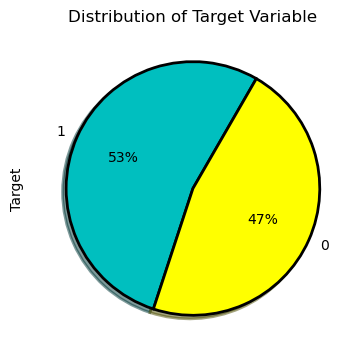

In [117]:
fig = plt.figure(figsize=(9,6))
plt.subplot(121)
df['Target'].value_counts().plot.pie(autopct = '%1.0f%%' , colors=['c','yellow'],startangle = 60, wedgeprops={"linewidth":2 , "edgecolor":"k"}, shadow=True)
plt.title("Distribution of Target Variable")
plt.show()

##### Inference: In the given dataset, The class seems to be fairly balanced

### Applying Transformation on Columns with Skewness

- **Before Transformation**

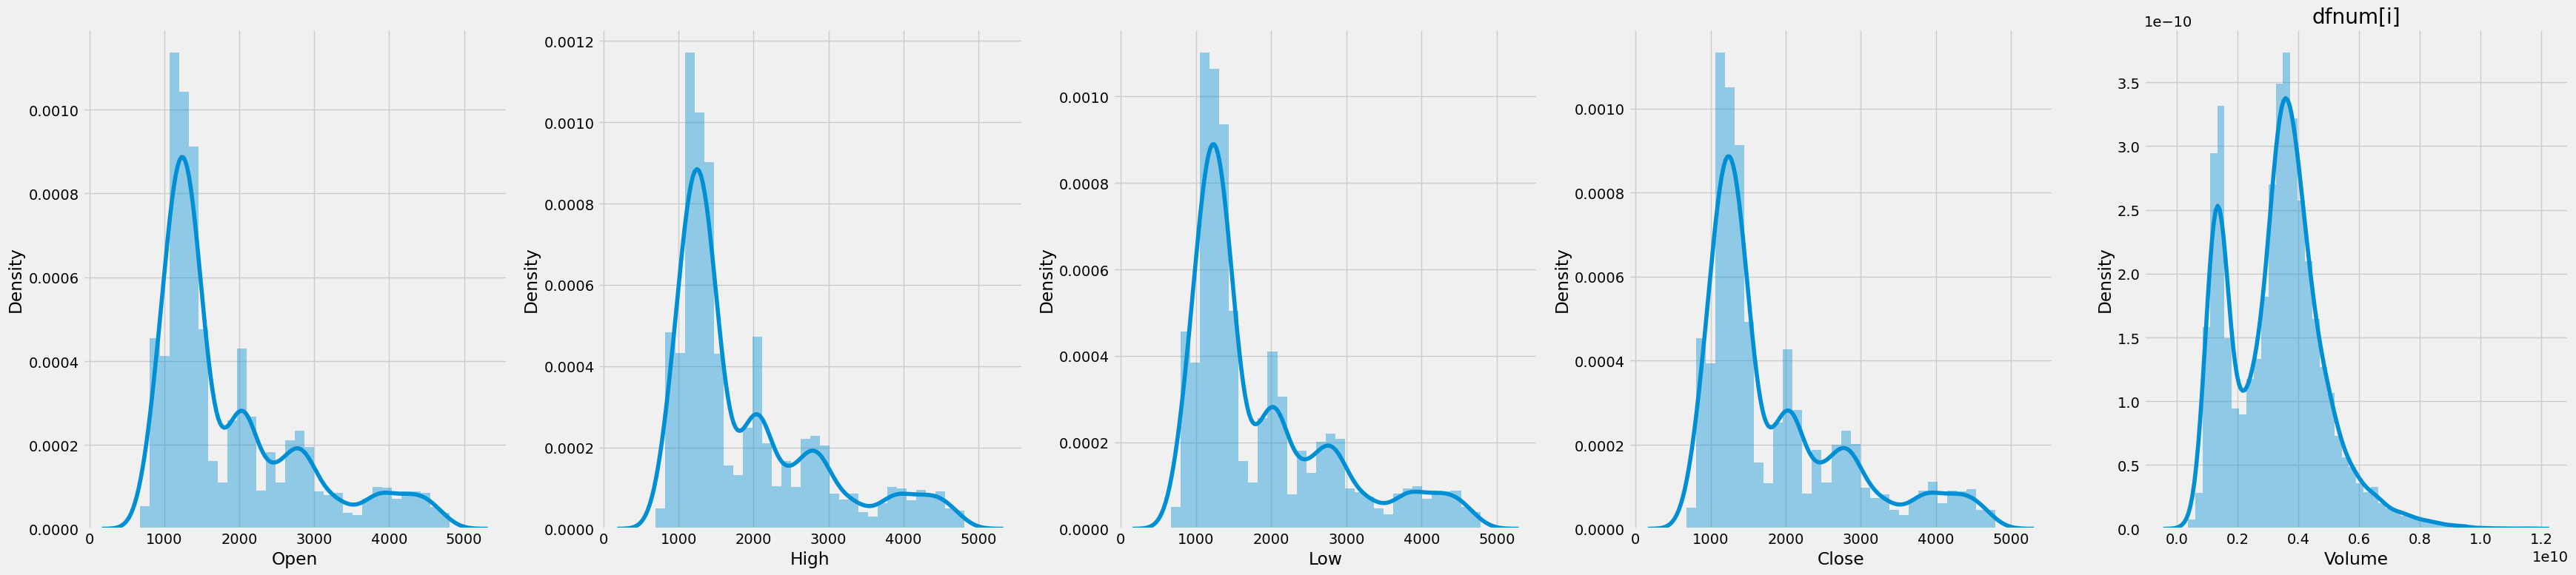

In [157]:
dfnum = df1.select_dtypes(include=np.number)
fig,ax= plt.subplots(1,5,figsize=(35,8))

for i,subplots in zip(dfnum ,ax.flatten()):
    sns.distplot(dfnum[i],ax=subplots)
    plt.title('dfnum[i]')
plt.tight_layout()

In [119]:
df1.skew()

Open        1.262090
High        1.267215
Low         1.256292
Close       1.261716
Volume      0.521743
Tomorrow    1.261457
Target     -0.135475
dtype: float64

In [120]:
dft = df1.copy()
from sklearn.preprocessing import PowerTransformer

p=PowerTransformer(method='box-cox')

dft['Open']=p.fit_transform(dft[['Open']])
dft['High']=p.fit_transform(dft[['High']])
dft['Low']=p.fit_transform(dft[['Low']])
dft['Close']=p.fit_transform(dft[['Close']])

- **After Transformation**

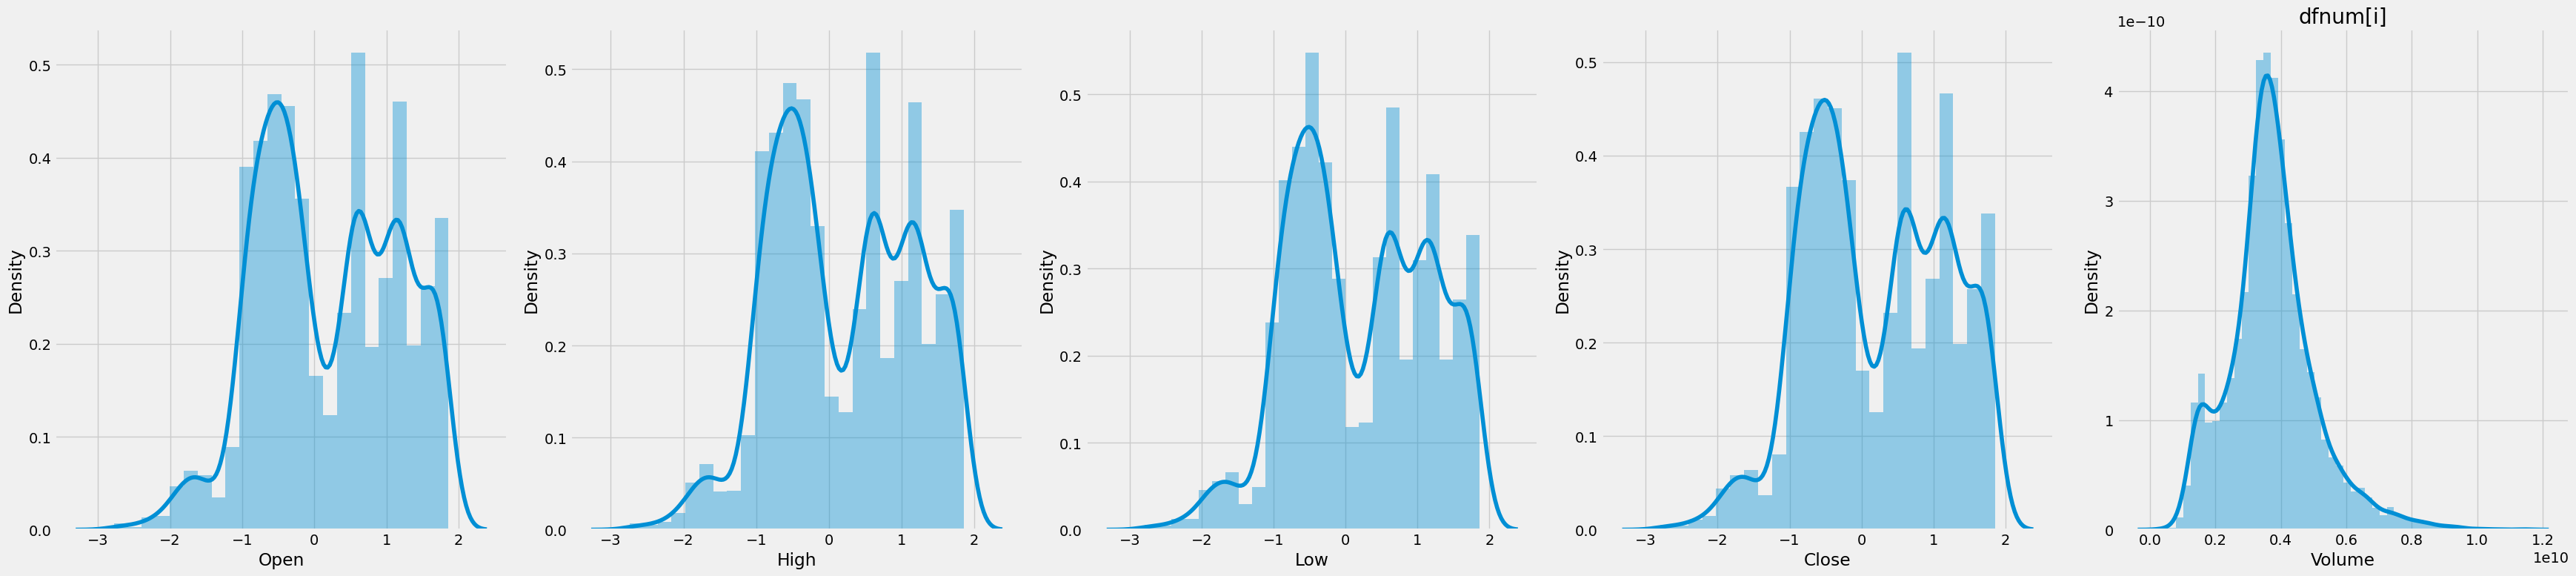

In [158]:
dfnum = dft.select_dtypes(include=np.number)
fig,ax= plt.subplots(1,5,figsize=(35,8))

for i,subplots in zip(dfnum ,ax.flatten()):
    sns.distplot(dfnum[i],ax=subplots)
    plt.title('dfnum[i]')
plt.tight_layout()

In [122]:
dft.skew()

Open        0.114595
High        0.119140
Low         0.110197
Close       0.114638
Volume      0.521743
Tomorrow    1.261457
Target     -0.135475
dtype: float64

### Splitting data for Train and Test
**Since the feaatures in this dataset have temporal nature, spliting the data randomly into train and test is not appropriate as it may lead to data leakage.
In this case, we can apply approximately 80:20 splitting w.r.t to time period. So, first 17 years of data can be used for training and last 5 years can be used for testing** 

In [123]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data = dft[dft['Date'] < '2018-01-01']   # 2000 to 2017
test_data = dft[(dft['Date'] >= '2018-01-01') & (dft['Date'] < '2022-12-30')]     # 2018 to 2023

# Separate the target variable from the predictors
xtrain = train_data.drop(['Date','Target', 'Tomorrow'], axis=1)
ytrain = train_data['Target']
xtest = test_data.drop(['Date','Target','Tomorrow'], axis=1)
ytest = test_data['Target']

## Model Building

In the given dataset the target variable is balanced but still it is not adviced to optimize accuracy of the model because stock market is volatile and in future data, there may be imbalance.

Moreover, In the stock market, the cost of false positives (predicting a stock will go up when it actually goes down) and false negatives (predicting a stock will go down when it actually goes up) can be asymmetric, i.e., the cost of a false positive may be different from the cost of a false negative. Therefore, accuracy may not be the best metric to evaluate the model's performance, and other metrics such as precision, recall, F1 score, or AUC-ROC should be considered.

In this case, since we are assuming that the individual wants to buy stock, we can optimize precision score i.e., minimizing false positive in order to avoid losses




 

### 1. Logistic Regression

In [124]:
# logistic regression 

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report, precision_score
accuracy_score(ytest,lr.predict(xtest))

print('\033[1mTraining data report:\033[0m \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytrain,lr.predict(xtrain)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytrain,lr.predict(xtrain)),2))

print()

print('\033[1mTest data report:\033[0m  \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytest,lr.predict(xtest)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytest,lr.predict(xtest)),2))


Training data report: 

ACCURACY SCORE:  0.53  , PRECISION SCORE:  0.53

Test data report:  

ACCURACY SCORE:  0.54  , PRECISION SCORE:  0.54


- **Inference** : The model is not in overfit state. However, both the scores are low.

### 2. Decision Tree with default parameter

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dt1=DecisionTreeClassifier()
dt1.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,dt1.predict(xtest))

print('\033[1mTraining data report:\033[0m \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytrain,dt1.predict(xtrain)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytrain,dt1.predict(xtrain)),2))

print()

print('\033[1mTest data report:\033[0m  \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytest,dt1.predict(xtest)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytest,dt1.predict(xtest)),2))


Training data report: 

ACCURACY SCORE:  1.0  , PRECISION SCORE:  1.0

Test data report:  

ACCURACY SCORE:  0.48  , PRECISION SCORE:  0.65


- **Inference** : The model is in overfit state. So, this model is not reliable

### 3. Random Forest with default parameter

In [126]:
from sklearn.ensemble import RandomForestClassifier

m=RandomForestClassifier()
m.fit(xtrain,ytrain)
print('\033[1mTraining data report:\033[0m \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytrain,dt1.predict(xtrain)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytrain,dt1.predict(xtrain)),2))

print()

print('\033[1mTest data report:\033[0m  \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytest,dt1.predict(xtest)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytest,dt1.predict(xtest)),2))


Training data report: 

ACCURACY SCORE:  1.0  , PRECISION SCORE:  1.0

Test data report:  

ACCURACY SCORE:  0.48  , PRECISION SCORE:  0.65


- **Inference** : The model is in overfit state. So, this model is not reliable

### 4. Random Forest with hyperparameter tuning

In [127]:
# random forest with parameter tuning

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split


m=RandomForestClassifier(n_estimators=60, max_depth=5)

m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('\033[1mTraining data report:\033[0m \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytrain,m.predict(xtrain)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytrain,m.predict(xtrain)),2))

print()

print('\033[1mTest data report:\033[0m  \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytest,m.predict(xtest)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytest,m.predict(xtest)),2))

Training data report: 

ACCURACY SCORE:  0.62  , PRECISION SCORE:  0.59

Test data report:  

ACCURACY SCORE:  0.48  , PRECISION SCORE:  0.61


- **Inference** : The model doesn't seem to be in overfit state. Accuracy is not very high but precision has increased to 63%

### 5. Ensembling model : Adaptive Boosting

In [128]:
# Ensembling model: AdaBoost

m=AdaBoostClassifier()

m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('\033[1mTraining data report:\033[0m \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytrain,m.predict(xtrain)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytrain,m.predict(xtrain)),2))

print()

print('\033[1mTest data report:\033[0m  \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytest,m.predict(xtest)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytest,m.predict(xtest)),2))

Training data report: 

ACCURACY SCORE:  0.58  , PRECISION SCORE:  0.58

Test data report:  

ACCURACY SCORE:  0.47  , PRECISION SCORE:  0.61


- **Inference** : The model doesn't seem to be in overfit state. Accuracy has declined but precision is 61%

### 6. Ensembling model :  Gradient Boosting

In [129]:
# Gradient Boosting

m=GradientBoostingClassifier()
m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('\033[1mTraining data report:\033[0m \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytrain,m.predict(xtrain)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytrain,m.predict(xtrain)),2))

print()

print('\033[1mTest data report:\033[0m  \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytest,m.predict(xtest)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytest,m.predict(xtest)),2))

Training data report: 

ACCURACY SCORE:  0.65  , PRECISION SCORE:  0.62

Test data report:  

ACCURACY SCORE:  0.48  , PRECISION SCORE:  0.66


- **Inference** : The model doesn't seem to be in overfit state. Accuracy is 48%, which is not very high. Precision is 66% 

### 7. Ensembling model : Xtreme Gradient Boosting

In [130]:
# Ensembling model: XGBoost
from xgboost import XGBClassifier
m=XGBClassifier()
m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('\033[1mTraining data report:\033[0m \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytrain,m.predict(xtrain)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytrain,m.predict(xtrain)),2))

print()

print('\033[1mTest data report:\033[0m  \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytest,m.predict(xtest)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytest,m.predict(xtest)),2))

Training data report: 

ACCURACY SCORE:  0.88  , PRECISION SCORE:  0.85

Test data report:  

ACCURACY SCORE:  0.48  , PRECISION SCORE:  0.57


- **Inference** : The model is in overfit state. Accuracy and Precision are both low

### Adding new features in the dataset

- **We will try to enhance the model's predictive power by incorporating additional predictors such as rolling averages. We can consider various factors, such as stock prices from 2 days, 1 week, 3 months, 1 year, and 5 years ago, and calculate the mean closing price for each horizon. Then, we'll compare today's closing price to those periods and determine the ratio to identify trends in the market. This could help us predict whether the stock is likely to rise or fall.**

In [131]:
#adding new features

horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = dft.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    dft[ratio_column] = dft["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    dft[trend_column] = dft.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [132]:
dft.head()

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
0,2000-03-01,-0.150082,-0.149010,-0.188494,-0.174743,931800000,1399.420044,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-01,-0.174496,-0.188909,-0.262679,-0.276024,1009000000,1402.109985,1,1.224685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-05-01,-0.275774,-0.265319,-0.299821,-0.270981,1085500000,1403.449951,1,0.990782,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-06-01,-0.270732,-0.267882,-0.272614,-0.268476,1092300000,1441.469971,1,0.995356,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-07-01,-0.268226,-0.213525,-0.256560,-0.199070,1225200000,1457.599976,1,0.851552,2.0,0.836924,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
dft.dropna(inplace=True)
dft.head()

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
1000,2003-12-26,-0.984496,-0.997882,-0.956853,-0.979444,356070000,1109.479980,1,0.997296,1.0,0.993052,3.0,0.887766,34.0,0.687320,135.0,1.053216,485.0
1001,2003-12-29,-0.979184,-0.966181,-0.951635,-0.940895,1058800000,1109.640015,1,0.979926,2.0,0.965597,4.0,0.856308,34.0,0.661731,135.0,1.011040,486.0
1002,2003-12-30,-0.940635,-0.965410,-0.922245,-0.940446,1012600000,1111.920044,1,0.999761,2.0,0.974634,4.0,0.859011,34.0,0.662661,135.0,1.009831,486.0
1003,2003-12-31,-0.940186,-0.957410,-0.922800,-0.934060,1027500000,1108.479980,0,0.996593,2.0,0.977132,4.0,0.856187,34.0,0.659418,136.0,1.002258,486.0
1004,2004-02-01,-0.933800,-0.939632,-0.925934,-0.943704,1153200000,1122.219971,1,1.005136,1.0,0.995773,4.0,0.867754,33.0,0.667334,135.0,1.011797,485.0


In [134]:
new_predictors

['Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_60',
 'Trend_60',
 'Close_Ratio_250',
 'Trend_250',
 'Close_Ratio_1000',
 'Trend_1000']

In [135]:
train_data = dft[dft['Date'] < '2018-01-01']   # 2000 to 2017
test_data = dft[(dft['Date'] >= '2018-01-01') & (dft['Date'] < '2022-12-30')]     # 2018 to 2022

# Separate the target variable (stock price) from the predictors

xtrain = train_data.drop(['Date','Target', 'Tomorrow'], axis=1)
ytrain = train_data['Target']

xtest = test_data.drop(['Date','Target', 'Tomorrow'], axis=1)
ytest = test_data['Target']

## Model Building with new parameters :

### 8. Random Forest with parameter tuning

In [137]:
# random forest with parameter tuning

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split


m=RandomForestClassifier(n_estimators=40, max_depth=10, min_samples_split=50, random_state=1)

m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('\033[1mTraining data report:\033[0m \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytrain,m.predict(xtrain)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytrain,m.predict(xtrain)),2))

print()

print('\033[1mTest data report:\033[0m  \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytest,m.predict(xtest)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytest,m.predict(xtest)),2))

Training data report: 

ACCURACY SCORE:  0.68  , PRECISION SCORE:  0.64

Test data report:  

ACCURACY SCORE:  0.53  , PRECISION SCORE:  0.55


- **Inference** : The model doesn't seem to be in overfit state. However, Accuracy and Precision scores are less.

### 9. Ensembling model: Adaptive Boosting


In [45]:
# Ensembling model: AdaBoost

m=AdaBoostClassifier(random_state=42)

m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,m.predict(xtest))

print('\033[1mTraining data report:\033[0m \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytrain,m.predict(xtrain)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytrain,m.predict(xtrain)),2))

print()

print('\033[1mTest data report:\033[0m  \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytest,m.predict(xtest)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytest,m.predict(xtest)),2))

Training data report: 

ACCURACY SCORE:  0.6  , PRECISION SCORE:  0.6

Test data report:  

ACCURACY SCORE:  0.49  , PRECISION SCORE:  0.65


- **Inference** : The model is not in overfit state. Accuracy is 49% however precision has improved to 65%

### 10. Ensembling model: Gradient Boosting

In [141]:
# Gradient Boosting

m=GradientBoostingClassifier()
m.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score
accuracy_score(ytest,m.predict(xtest))

print('\033[1mTraining data report:\033[0m \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytrain,m.predict(xtrain)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytrain,m.predict(xtrain)),2))

print()

print('\033[1mTest data report:\033[0m  \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytest,m.predict(xtest)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytest,m.predict(xtest)),2))


Training data report: 

ACCURACY SCORE:  0.65  , PRECISION SCORE:  0.69

Test data report: 

ACCURACY SCORE:  0.64  , PRECISION SCORE:  0.68


- **Inference** : The model is not in overfit state. Accuracy and Precision have both improved to 64% and 68% respectively.

### 11. Support Vector Machine algorithm

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the time series SVM model
m = SVC()#kernel='rbf')
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)

print('\033[1mTraining data report:\033[0m \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytrain,m.predict(xtrain)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytrain,m.predict(xtrain)),2))

print()

print('\033[1mTest data report:\033[0m  \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytest,m.predict(xtest)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytest,m.predict(xtest)),2))

Training data report: 

ACCURACY SCORE:  0.55  , PRECISION SCORE:  0.55

Test data report:  

ACCURACY SCORE:  0.54  , PRECISION SCORE:  0.54


- **Inference** : The model is not in overfit state. But both Accuracy and Precision are low

In [ ]:
# SVM with hyperparameter tuning

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an SVM object and perform grid search with cross-validation
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(xtrain, ytrain)

# Print the best parameters found by GridSearchCV
print('Best parameters:', grid_search.best_params_)

# Make predictions on the test data using the best parameters found
ypred = grid_search.predict(xtest)

# Calculate accuracy on the test data
accuracy = accuracy_score(ytest, ypred)
print('Test Accuracy:', accuracy)

# Print classification report for training data
print('Training data report')
print(classification_report(ytrain, grid_search.predict(xtrain)))

# Print classification report for test data
print('Test data report')
print(classification_report(ytest, ypred))


The above is SVM model with hyperparameter tuning. The result is not executed here as it was not properly running on jupyter notebook. However, the result achieved by executing this code on other platform gives no significant improvement. 

### 12. Light Gradient Boosting Machine algorithm

In [52]:
import lightgbm as lgb

# Create LightGBM model
m = lgb.LGBMClassifier()

# Fit the model on the training data
m.fit(xtrain, ytrain)

# Predict on the test data and calculate accuracy score
y_pred = m.predict(xtest)
print('\033[1mTraining data report:\033[0m \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytrain,m.predict(xtrain)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytrain,m.predict(xtrain)),2))

print()

print('\033[1mTest data report:\033[0m  \n')

print('ACCURACY SCORE: ',round(accuracy_score(ytest,m.predict(xtest)),2), end='  , ')
print('PRECISION SCORE: ', round(precision_score(ytest,m.predict(xtest)),2))

Training data report: 

ACCURACY SCORE:  0.9  , PRECISION SCORE:  0.89

Test data report:  

ACCURACY SCORE:  0.52  , PRECISION SCORE:  0.56


- **Inference** : The model is in overfit state.

In [ ]:
# LGBM with hyperparameter tuning

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'num_leaves': [5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [-1, 3, 5],
    'n_estimators': [100, 500, 1000]
}

# Create LightGBM model
m = lgb.LGBMClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(m, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(xtrain, ytrain)

# Print the best parameters found by GridSearchCV
print('Best parameters:', grid_search.best_params_)

# Use the best parameters to fit the model and make predictions on the test data
m = lgb.LGBMClassifier(**grid_search.best_params_)
m.fit(xtrain, ytrain)
y_pred = m.predict(xtest)

# Calculate accuracy on the test data
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for training and test data
print('Training data report')
print(classification_report(ytrain, m.predict(xtrain)))

print()
print('Test data report')
print(classification_report(ytest, m.predict(xtest)))


The above is LGBM model with hyperparameter tuning. The result is not executed here as it was not properly running on jupyter notebook. However, the result achieved by executing this code on other platform gives no significant improvement.

### A Comprehensive table to evaluate all the models :

In [144]:
mdic = { 'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'RandomForest Tuned',
                   'Ada-Boost','Gradient Boost', 'XGBoost','Random Forest with added features', 
                   'Ada-Boost with added features', 'Gradient Boost with added features', 'SVM model with added feature',
                  'LGBM with added features'],
        
         'Precision_score':[0.54, 0.61, 0.61, 0.63, 0.61, 0.65, 0.57, 0.55, 0.65, 0.68, 0.54, 0.56]}
model_df = pd.DataFrame(mdic)
model_df.sort_values(by='Precision_score', ascending=False)

,Model,Precision_score
9,Gradient Boost with added features,0.68
5,Gradient Boost,0.65
8,Ada-Boost with added features,0.65
3,RandomForest Tuned,0.63
1,Decision Tree,0.61
2,Random Forest,0.61
4,Ada-Boost,0.61
6,XGBoost,0.57
11,LGBM with added features,0.56
7,Random Forest with added features,0.55


- **From the above table we can find that model with new added features and Gradient boost emsembling has attained the highest Precision score which is our required metric in this case. Moreover, this model is not into overfit state.**

## Conclusion and Suggestion

- **The final model (Gradient boosting with added features) seems to be performing moderately well with an accuracy of 64% and precision of 68%. However, there is room for improvement in order to achieve better predictive power.**


- **Information about some more features can help to predict the stock prices better. Such as economic indicators, news sentiment, Company financials(revenue, earnings, cash flow, and debt levels), Investor sentiment etc.**


-  **It's necessary to keep in mind that stock prices can be highly unpredictable and influenced by a multitude of factors, including unexpected news events or changes in the overall market. Therefore, it's important to continue monitoring the model's performance and making adjustments as needed to ensure that it remains accurate and effective over time.**